# <center>OLS Linear Regession</center>

## Mục lục
* [Thực hành: OLS Regression](#c1)
* [Đồ án 3: Linear Regression](#c2)
    * [Nội dung đồ án](#c21)
    * [Quy định nộp bài](#c22)
    * [Quy định chấm bài](#c23)

## Thực hành <a class="anchor" id="c1"></a>

Các phần được giới thiệu trong lab này là:
1. Bình phương tối tiểu
2. Mô hình hồi quy tuyến tính

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Chuẩn bị

Sử dụng dữ liệu Bài 1a trong Bài tập 4.

| x | 0 | 1 | 2 |
|---|---|---|---|
| y | 0 | 2 | 7 |

#### Dữ liệu đầu vào

In [2]:
x = np.array([0, 1, 2]).reshape(-1, 1)
y = np.array([0, 2, 7]).reshape(-1, 1)

#### Trực quan hóa

In [3]:
def plot_data(x, y):
    plt.scatter(x, y, color='b', marker='o')
  
    plt.xlabel('x')
    plt.ylabel('y')
  
    plt.show()

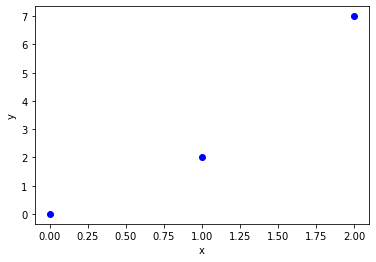

In [4]:
plot_data(x, y)

In [5]:
def preprocess(x, y):
    A = np.hstack((np.ones((x.shape[0], 1)), x))
    
    return A, y

In [6]:
A, b = preprocess(x, y)
A, b

(array([[1., 0.],
        [1., 1.],
        [1., 2.]]),
 array([[0],
        [2],
        [7]]))

### Mô hình hồi quy tuyến tính (OLS Linear Regession Model)

Ta cần tìm nghiệm của phương trình $Ax \approx b$

Xét ma trận **A** có kích thước *m x n* (*m* > *n*) và vector (cột) **b** có kích thước *m*. Ta có chuẩn Euclidean của bình phương phần dư $r$ của $Ax - b$ như sau:

**$$r = ||Ax - b||^{2} \ \ \ \  (1) $$**


Để giải được nghiệm $x$ cho hệ phương trình, ta thực hiện tối thiểu hóa công thức (1) được nghiệm $x$ của hệ phương trình được tính như sau:

$$x = (A^T A)^{-1} A^T b$$

*Note: $(A^T A)^{-1} A^T$ là ma trận giả nghịch đảo của A*

In [7]:
def ols_linear_regression(A, b):
    A_pinv = np.linalg.inv(A.T @ A) @ A.T    # np.linalg.pinv(A)
    x = A_pinv @ b
    
    return x

In [8]:
ols_linear_regression(A, b)

array([[-0.5],
       [ 3.5]])

### Trực quan hóa

In [9]:
def plot_regression(x, y):
    A, b = preprocess(x, y)
    
    weight = ols_linear_regression(A, b)
    
    # Plot data
    plt.scatter(x, y, color='b', marker='o')
  
    # Plot regression line
    y_pred = weight[0] + weight[1] * x
    plt.plot(x, y_pred, color='r', label='y = {:.2f} + {:.2f}*x'.format(weight[0][0], weight[1][0]))
  
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='lower right')
    
    plt.show()

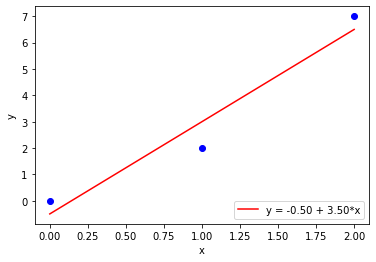

In [10]:
plot_regression(x, y)

## Đồ án 3: Linear regression <a class="anchor" id="c2"></a>

### Nội dung đồ án <a class="anchor" id="c21"></a>

#### Giới thiệu dữ liệu

File **"wine.csv"** là cơ sở dữ liệu đánh giá chất lượng của 1200 chai rượu vang theo thang điểm 1 - 10 dựa trên 11 tính chất khác nhau. 

In [11]:
import pandas as pd
df = pd.read_csv('wine.csv', sep=';')

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5,6
1195,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5,6
1196,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5,6
1197,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8,6


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.625271,0.519133,0.293353,2.564470,0.089266,15.242702,46.884070,0.997059,3.298582,0.665738,10.383069,5.664721
std,1.781795,0.179208,0.196751,1.264441,0.048310,10.210406,33.949177,0.001878,0.156161,0.175921,1.091891,0.809593
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.300000,0.390000,0.120000,1.900000,0.071000,7.000000,21.000000,0.996000,3.195000,0.560000,9.500000,5.000000
50%,8.300000,0.500000,0.290000,2.200000,0.080000,13.000000,38.000000,0.997020,3.300000,0.620000,10.000000,6.000000
75%,9.600000,0.630000,0.450000,2.700000,0.092000,21.000000,63.000000,0.998175,3.390000,0.735000,11.000000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003200,3.900000,2.000000,14.900000,8.000000


#### Yêu cầu

Trong đồ án này, bạn được yêu cầu thực hiện:

1. Xây dựng mô hình đánh giá chất lượng rượu sử dụng phương pháp hồi quy tuyến tính (7 điểm)

	1a. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp (2 điểm)
    
	1b. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất (Gợi ý: Phương pháp Cross Validation) (2 điểm)
	
    1c. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất (Không giống mô hình của 2 ý trên) (3 điểm)
    
    
2. Báo cáo về kết quả, đánh giá và nhận xét các mô hình đã xây dựng (3 điểm)

### Quy định bài nộp <a class="anchor" id="c22"></a>

* Thực hiện toàn bộ bài làm trên 1 tập tin Jupyter Notebook (.ipynb) hoặc Python (.py)


* Bạn nộp tập tin `MSSV.zip` được nén từ thư mục MSSV chứa các tập tin sau:
    1. Báo cáo toàn bộ bài làm: `MSSV.pdf`
    2. Mã nguồn: `MSSV.ipynb` hoặc `MSSV.py`


* Trong đó, nội dung tập tin báo cáo gồm có:
    - Thông tin cá nhân: họ và tên, MSSV
    - Báo cáo và đánh giá kết quả từ các mô hình xây dựng được
    - Báo cáo và đưa giả thuyết cho mô hình đạt kết quả tốt nhất
    
    
* Ví dụ minh họa cây thư mục bài nộp sau khi giải nén tập tin `MSSV.zip` như sau:
```
MSSV
├── MSSV.pdf
└── MSSV.ipynb hoặc MSSV.py
```

### Quy định chấm bài <a class="anchor" id="c23"></a>

Đây là đồ án chiếm 15%.

Những trường hợp sau đây sẽ bị 0 điểm toàn bộ đồ án:
* Nộp sai quy định
* Không có báo cáo
* Thực thi mã nguồn báo lỗi

<font style="color:red">**LƯU Ý: SAO CHÉP BÀI LÀM CỦA NHAU SẼ BỊ 0 ĐIỂM TOÀN BỘ PHẦN THỰC HÀNH**</font>